In [1]:
import numpy as np
import pandas as pd
import datetime
from fastai.imports import *
from fastai.structured import *
from sklearn.preprocessing import LabelEncoder

In [2]:
np.random.seed(0)

### Exploring data and preprocessing

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 120)
pd.set_option('mode.chained_assignment', None)
pd.set_option('io.hdf.default_format','table')

plt.style.use('fivethirtyeight')

%matplotlib inline

In [4]:
# Read the data
interviews = pd.read_csv('HR_Recruitment.csv')

In [5]:
# Print first 5 rows
interviews.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 95,Male,Chennai,Chennai,Chennai,Chennai,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Single
1,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 96,Male,Chennai,Chennai,Chennai,Chennai,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,no,Married
2,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 97,Male,Chennai,Chennai,Chennai,Hyderabad,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Married
3,25.5.2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 98,Female,Chennai,Chennai,Chennai,Hyderabad,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Married
4,25-05-2016,Standard Chartered Bank,BFSI,Chennai,Routine,Accounting Operations,Scheduled Walkin,Candidate 99,Male,Chennai,Chennai,Chennai,Hyderabad,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,yes,Married


In [6]:
# Descriptive Summary of the data
interviews.describe()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
count,714,714,714,714,714,714,714,714,714,714,714,714,714,518,526,527,487,526,482,469,709,714,714
unique,42,7,3,9,2,60,5,714,2,8,4,5,36,4,3,4,3,5,5,8,6,7,2
top,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 763,Male,Chennai,Chennai,Chennai,Chennai,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
freq,220,601,619,449,616,220,399,1,572,449,557,519,351,475,523,519,479,519,475,458,502,399,453


### Data Cleaning

In [7]:
# Since the names of the columns are lengthy, renaming the columns
newnames = {
    'Date of Interview': 'Date',
    'Have you obtained the necessary permission to start at the required time':'Permission',
    'Hope there will be no unscheduled meetings':'Meetings',
    'Can I Call you three hours before the interview and follow up on your attendance for the interview':'Follow Up Call',
    'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much':'Alternative Number',
    'Have you taken a printout of your updated resume. Have you read the JD and understood the same':'Printout',
    'Are you clear with the venue details and the landmark.':'Venue Details',
    'Has the call letter been shared':'Shared Letter',
    'Nature of Skillset':'Skillset',
    'Position to be closed':'Position'
}
interviews.rename(columns=newnames, inplace=True)

In [8]:
# Print columns
interviews.columns

Index(['Date', 'Client name', 'Industry', 'Location', 'Position', 'Skillset', 'Interview Type', 'Name(Cand ID)', 'Gender', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Permission', 'Meetings', 'Follow Up Call', 'Alternative Number', 'Printout', 'Venue Details', 'Shared Letter', 'Expected Attendance', 'Observed Attendance', 'Marital Status'], dtype='object')

In [9]:
# Check number of null values in each column
interviews.isnull().sum()

Date                            0
Client name                     0
Industry                        0
Location                        0
Position                        0
Skillset                        0
Interview Type                  0
Name(Cand ID)                   0
Gender                          0
Candidate Current Location      0
Candidate Job Location          0
Interview Venue                 0
Candidate Native location       0
Permission                    196
Meetings                      188
Follow Up Call                187
Alternative Number            227
Printout                      188
Venue Details                 232
Shared Letter                 245
Expected Attendance             5
Observed Attendance             0
Marital Status                  0
dtype: int64

In [10]:
# Check percentage of null values in each column
interviews.isnull().mean() * 100

Date                           0.000000
Client name                    0.000000
Industry                       0.000000
Location                       0.000000
Position                       0.000000
Skillset                       0.000000
Interview Type                 0.000000
Name(Cand ID)                  0.000000
Gender                         0.000000
Candidate Current Location     0.000000
Candidate Job Location         0.000000
Interview Venue                0.000000
Candidate Native location      0.000000
Permission                    27.450980
Meetings                      26.330532
Follow Up Call                26.190476
Alternative Number            31.792717
Printout                      26.330532
Venue Details                 32.492997
Shared Letter                 34.313725
Expected Attendance            0.700280
Observed Attendance            0.000000
Marital Status                 0.000000
dtype: float64

In [11]:
# Drop rows with all values as null
interviews = interviews.dropna(how='all')

In [12]:
# Print unique values for each column
for column in interviews.columns:
    print(column)
    print(interviews[column].unique())
    print('-'*40)

Date
['25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '13.04.2016' '27.02.2016' '07.05.2016' '12.04.2016'
 '24.05.2016' '26/05/2016' '10.05.2016' '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM' '28.8.2016 & 04.00 PM'
 '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM' '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM'
 '28.08.2016 & 10.00 AM' '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016' '23.02.2016'
 '22.03.2016' '26.02.2016' '06.02.2016' '21.4.2016' '22.01.2016' '09.01.2016' '30.05.2016' '07.06.2016'
 '20.08.2016' '14.01.2016' '30.01.2016' '30.1.2016' '30-1-2016' '06.05.2016']
----------------------------------------
Client name
['Standard Chartered Bank' 'ANZ' 'Hospira' 'Pfizer' 'Aon hewitt Gurgaon' 'Aon Hewitt' 'Astrazeneca']
----------------------------------------
Industry
['BFSI' 'Pharmaceuticals' 'IT Products and Services']
----------------------------------------
L

In [13]:
# Removing skillset column as it contains varied data
interviews.drop('Skillset', axis=1, inplace=True)

In [14]:
# Print ubique values in date
interviews['Date'].unique()

array(['25.5.2016', '25-05-2016', '25.05.2016', '25-5-2016', '13.04.2016', '27.02.2016', '07.05.2016',
       '12.04.2016', '24.05.2016', '26/05/2016', '10.05.2016', '28.08.2016 & 09.00 AM',
       '28.08.2016 & 9.30 AM', '28.8.2016 & 12.00 PM', '28.08.2016 & 09.30 AM', '28.8.2016 & 10.30 AM',
       '28.8.2016 & 09.30 AM', '28.8.2016 & 04.00 PM', '28.08.2016 & 11.30 AM', '28.08.2016 & 11.00 AM',
       '28.08.2016 & 10.30 AM', '28.8.2016 & 03.00 PM', '28.08.2016 & 10.00 AM', '28.8.2016 & 02.00 PM',
       '28.8.2016 & 11.00 AM', '13.06.2016', '02.09.2016', '23.02.2016', '22.03.2016', '26.02.2016',
       '06.02.2016', '21.4.2016', '22.01.2016', '09.01.2016', '30.05.2016', '07.06.2016', '20.08.2016',
       '14.01.2016', '30.01.2016', '30.1.2016', '30-1-2016', '06.05.2016'], dtype=object)

* Since date column has mixed formats, need to clean date column

In [15]:
def fix_dates(row):
    
    if row == 'NA':
        return 'NA','NA','NA'
    else:
        string  = row.replace(" ", "")
        string  = string.replace("–", "-")

        if '&' in string:
            string = string.split('&')[0]

        if '.' in string:
            d, m, y = string.split('.')
        elif '/' in string:
            d, m, y = string.split('/')
        elif '-' in string:
            d, m, y = string.split('-')

        d = int(d)
        y = int(y)
        m = int(m)

        a = datetime.date(y, m, d)

        return d,m,y

In [16]:
# Creating day, month and year column
interviews['day'],interviews['month'],interviews['year'] = zip(*interviews['Date'].apply(fix_dates))

In [17]:
# Dropping date column
interviews.drop('Date', inplace=True, axis=1)

In [18]:
# Creating new date column with proper format
interviews['Date'] = pd.to_datetime(pd.DataFrame({'year': interviews['year'],
                                            'month': interviews['month'],
                                            'day': interviews['day']}), format = '%Y-%m-%d')

In [19]:
# Dropping year, month and day column
interviews.drop(['year', 'month', 'day'], axis = 1, inplace = True)

* Extracting date information from date variable.
* Date contains a ton of useful information -- day of week, weekday/weekend, month, year, start of month, etc, which can be ctracted through add_datepart function from fastai

In [20]:
add_datepart(interviews, 'Date')

##### Replaced the keywords that were similar across all columns.

In [21]:
interviews['Client name'].replace(['Aon hewitt Gurgaon', 'Aon Hewitt'], 'Aon Hewitt', inplace=True)

In [22]:
interviews['Location'].replace(['chennai', 'CHENNAI'], 'Chennai', inplace=True)
interviews['Location'].replace('Gurgaonr', 'Gurgaon', inplace=True)

In [23]:
for idx,row in enumerate(interviews['Interview Type']):
    string = row.upper()
    
    if 'ULED WALK' in string:
        interviews['Interview Type'].iloc[idx] = 'Scheduled Walkin'
    elif 'WALK' in string:
        interviews['Interview Type'].iloc[idx] = 'Walkin'
    else:
        interviews['Interview Type'].iloc[idx] = string.capitalize()

In [24]:
interviews['Candidate Current Location'].replace(['chennai', 'CHENNAI'], 'Chennai', inplace=True)

In [25]:
interviews['Permission'].replace('yes', 'Yes', inplace=True)
interviews['Permission'].replace('Not yet','No', inplace=True)

interviews['Meetings'].replace('yes', 'Yes', inplace=True)

interviews['Follow Up Call'].replace('yes', 'Yes', inplace=True)
interviews['Follow Up Call'].replace('Na', 'No', inplace=True)

interviews.drop('Alternative Number', axis=1, inplace=True)

interviews['Printout'].replace('yes', 'Yes', inplace=True)
interviews['Printout'].replace(['Not yet', 'na'], 'No', inplace=True)

interviews['Venue Details'].replace('yes', 'Yes', inplace=True)
interviews['Venue Details'].replace(['na', 'no'], 'No', inplace=True)

interviews['Shared Letter'].replace('yes', 'Yes', inplace=True)
interviews['Shared Letter'].replace(['Yet to Check', 'Not Sure', 'Not yet', 'no', 'na'], 'No', inplace=True)

interviews['Expected Attendance'].fillna('Yes', inplace=True)
interviews['Expected Attendance'].replace(['10.30 Am', '11:00 AM'], 'Yes', inplace=True)
interviews['Expected Attendance'].replace('NO', 'No', inplace=True)

interviews['Observed Attendance'].replace(['yes', 'yes '], 'Yes', inplace=True)
interviews['Observed Attendance'].replace(['NO', 'No ', 'no ', 'no'], 'No', inplace=True)

In [26]:
# Printing unique values in each column
for column in interviews.columns:
    print(column)
    print(interviews[column].unique())
    print('-'*40)

Client name
['Standard Chartered Bank' 'ANZ' 'Hospira' 'Pfizer' 'Aon Hewitt' 'Astrazeneca']
----------------------------------------
Industry
['BFSI' 'Pharmaceuticals' 'IT Products and Services']
----------------------------------------
Location
['Chennai' 'Bangalore' 'Hyderabad' 'Gurgaon' 'Delhi' 'Noida']
----------------------------------------
Position
['Routine' 'Niche']
----------------------------------------
Interview Type
['Scheduled Walkin' 'Scheduled ' 'Walkin']
----------------------------------------
Name(Cand ID)
['Candidate 95' 'Candidate 96' 'Candidate 97' 'Candidate 98' 'Candidate 99' 'Candidate 100' 'Candidate 101'
 'Candidate 102' 'Candidate 103' 'Candidate 104' 'Candidate 105' 'Candidate 106' 'Candidate 107'
 'Candidate 108' 'Candidate 109' 'Candidate 110' 'Candidate 111' 'Candidate 112' 'Candidate 117'
 'Candidate 118' 'Candidate 119' 'Candidate 120' 'Candidate 121' 'Candidate 122' 'Candidate 123'
 'Candidate 124' 'Candidate 125' 'Candidate 126' 'Candidate 127' 'Can

In [27]:
# Printing summary of data
interviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 33 columns):
Client name                   714 non-null object
Industry                      714 non-null object
Location                      714 non-null object
Position                      714 non-null object
Interview Type                714 non-null object
Name(Cand ID)                 714 non-null object
Gender                        714 non-null object
Candidate Current Location    714 non-null object
Candidate Job Location        714 non-null object
Interview Venue               714 non-null object
Candidate Native location     714 non-null object
Permission                    518 non-null object
Meetings                      526 non-null object
Follow Up Call                527 non-null object
Printout                      526 non-null object
Venue Details                 482 non-null object
Shared Letter                 469 non-null object
Expected Attendance           714 non-null ob

### Handling missing values

#### Permission

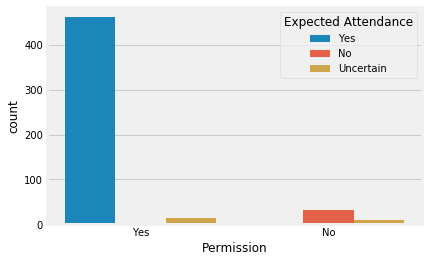

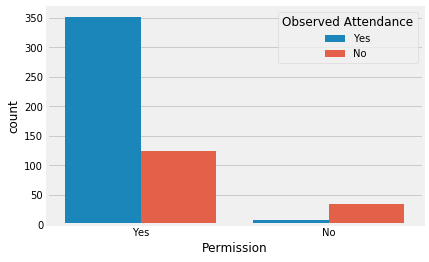

In [28]:
sns.countplot(x=interviews['Permission'], hue=interviews['Expected Attendance'])
plt.show();
sns.countplot(x=interviews['Permission'], hue=interviews['Observed Attendance'])
plt.show();

People who were certain of not attending the interview didn't take the necessary permissions. Hence, the same was chosen while filling the missing data

In [29]:
index_nan_perm = interviews['Permission'][interviews['Permission'].isnull()].index
for i in index_nan_perm:
    if interviews.iloc[i]['Expected Attendance'] == 'No':
        interviews['Permission'].at[i] = 'No'
    else:
        interviews['Permission'].at[i] = 'Yes'

#### Meetings

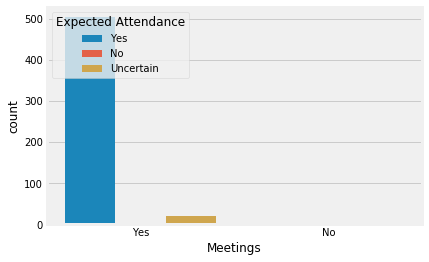

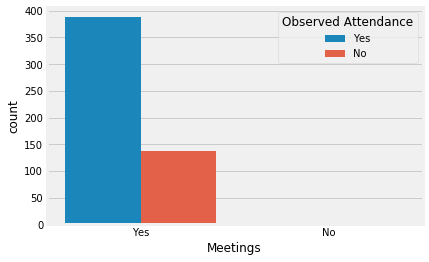

In [30]:
sns.countplot(x=interviews['Meetings'], hue=interviews['Expected Attendance'])
plt.show()
sns.countplot(x=interviews['Meetings'], hue=interviews['Observed Attendance'])
plt.show()

In [31]:
index_nan_details = interviews['Meetings'][interviews['Meetings'].isnull()].index
for i in index_nan_details:
    if interviews.iloc[i]['Expected Attendance'] == 'No':
        interviews['Meetings'].at[i] = 'No'
    else:
        interviews['Meetings'].at[i] = 'Yes'

#### Follow Up Call

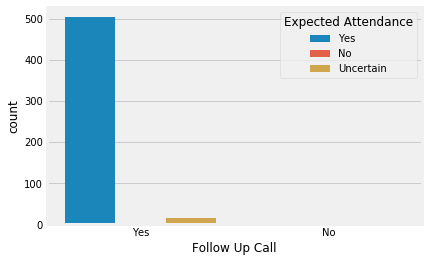

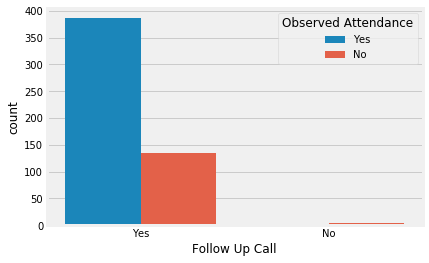

In [32]:
sns.countplot(x=interviews['Follow Up Call'], hue=interviews['Expected Attendance'])
plt.show()
sns.countplot(x=interviews['Follow Up Call'], hue=interviews['Observed Attendance'])

In [33]:
index_nan_details = interviews['Follow Up Call'][interviews['Follow Up Call'].isnull()].index
for i in index_nan_details:
    if interviews.iloc[i]['Expected Attendance'] == 'No':
        interviews['Follow Up Call'].at[i] = 'No'
    else:
        interviews['Follow Up Call'].at[i] = 'Yes'

#### Printout

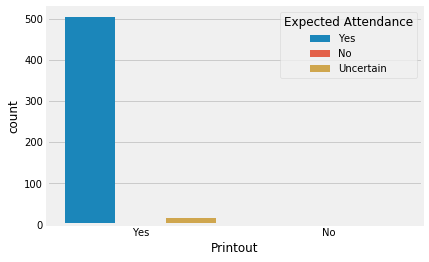

In [34]:
sns.countplot(x=interviews['Printout'], hue=interviews['Expected Attendance'])
plt.show()

Comparitively, people who chose not to attend the interview didn't take the printout

In [35]:
index_nan_print = interviews['Printout'][interviews['Printout'].isnull()].index
for i in index_nan_print:
    if interviews.iloc[i]['Expected Attendance'] == 'No':
        interviews['Printout'].at[i] = 'No'
    else:
        interviews['Printout'].at[i] = 'Yes'

#### Venue Details

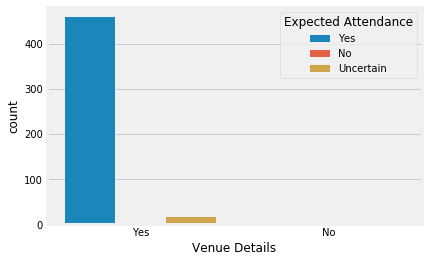

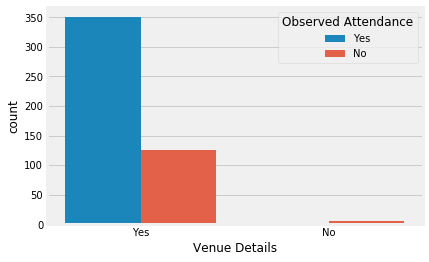

In [36]:
sns.countplot(x=interviews['Venue Details'], hue=interviews['Expected Attendance'])
plt.show()
sns.countplot(x=interviews['Venue Details'], hue=interviews['Observed Attendance'])
plt.show()

In [37]:
index_nan_details = interviews['Venue Details'][interviews['Venue Details'].isnull()].index
for i in index_nan_details:
    if (interviews.iloc[i]['Expected Attendance'] == 'No'):
        interviews['Venue Details'].at[i] = 'No'
    else:
        interviews['Venue Details'].at[i] = 'Yes'

#### Shared Letter

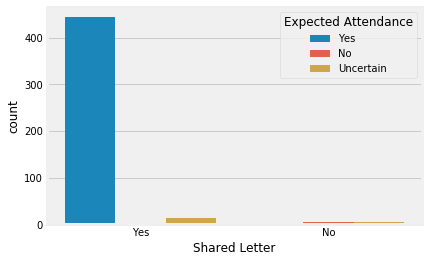

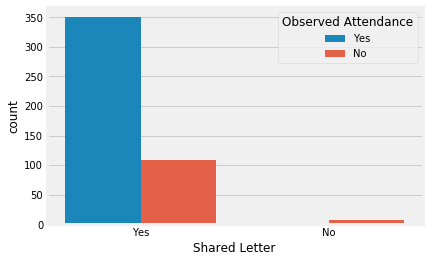

In [38]:
sns.countplot(x=interviews['Shared Letter'], hue=interviews['Expected Attendance'])
plt.show()
sns.countplot(x=interviews['Shared Letter'], hue=interviews['Observed Attendance'])
plt.show()

In [39]:
index_nan_details = interviews['Shared Letter'][interviews['Shared Letter'].isnull()].index
for i in index_nan_details:
    if interviews.iloc[i]['Expected Attendance'] == 'No':
        interviews['Shared Letter'].at[i] = 'No'
    else:
        interviews['Shared Letter'].at[i] = 'Yes'

### Visualizations for Better Understanding of Data

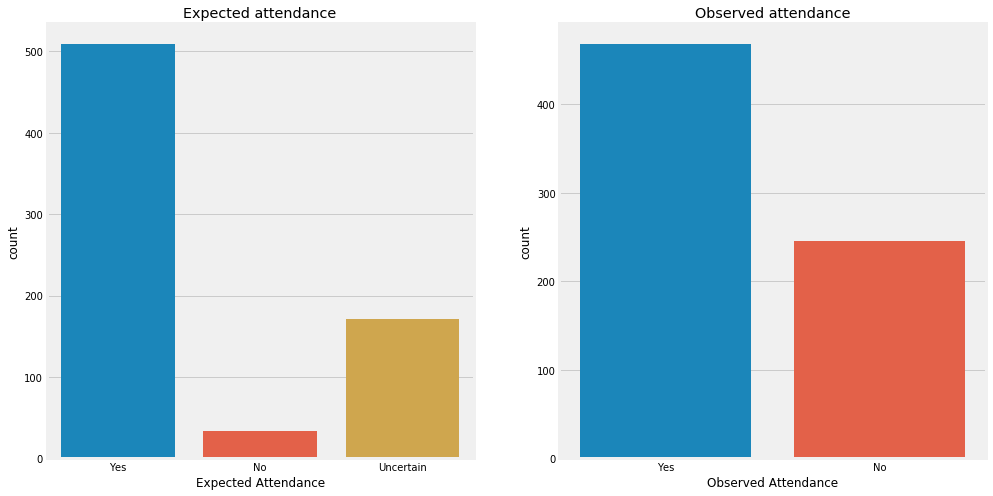

In [40]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interviews['Expected Attendance'], ax=ax1)
ax1.set_title('Expected attendance')
sns.countplot(x=interviews['Observed Attendance'], ax=ax2)
ax2.set_title('Observed attendance')
plt.show()

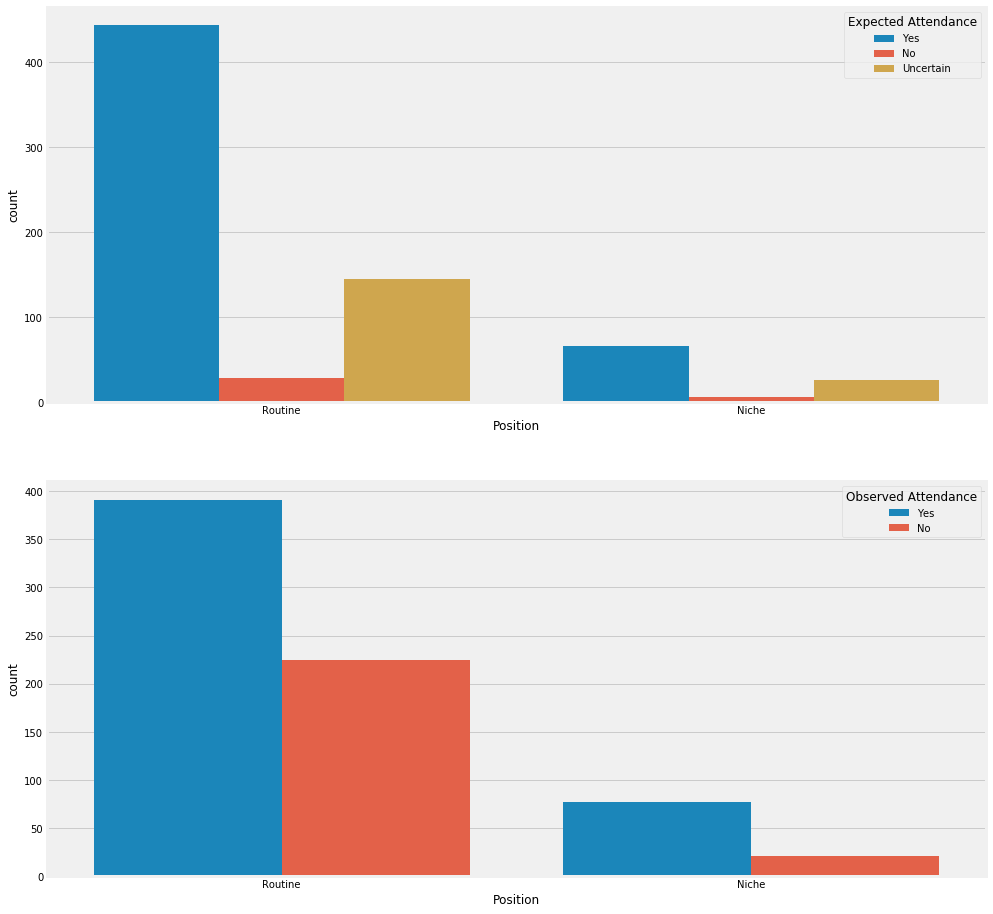

In [41]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interviews['Position'], hue=interviews['Expected Attendance'], ax=ax1)
sns.countplot(x=interviews['Position'], hue=interviews['Observed Attendance'], ax=ax2)
plt.show()

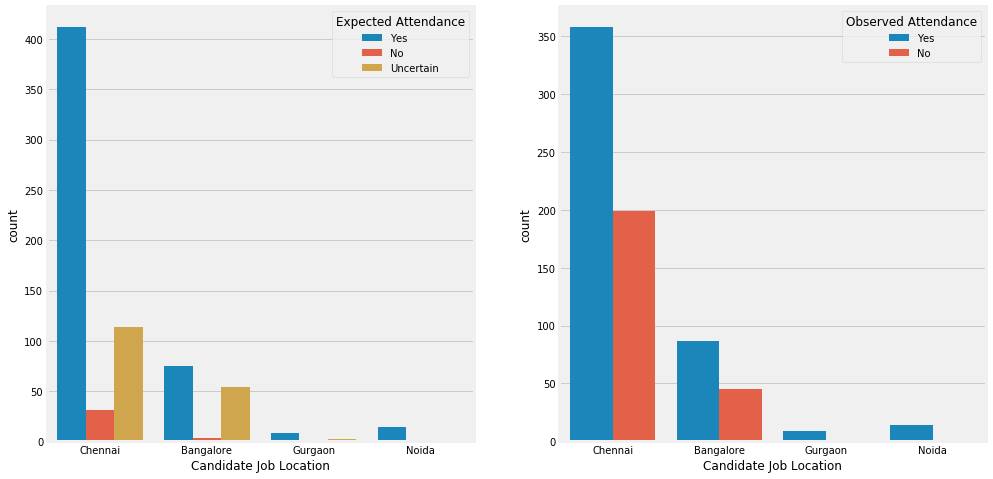

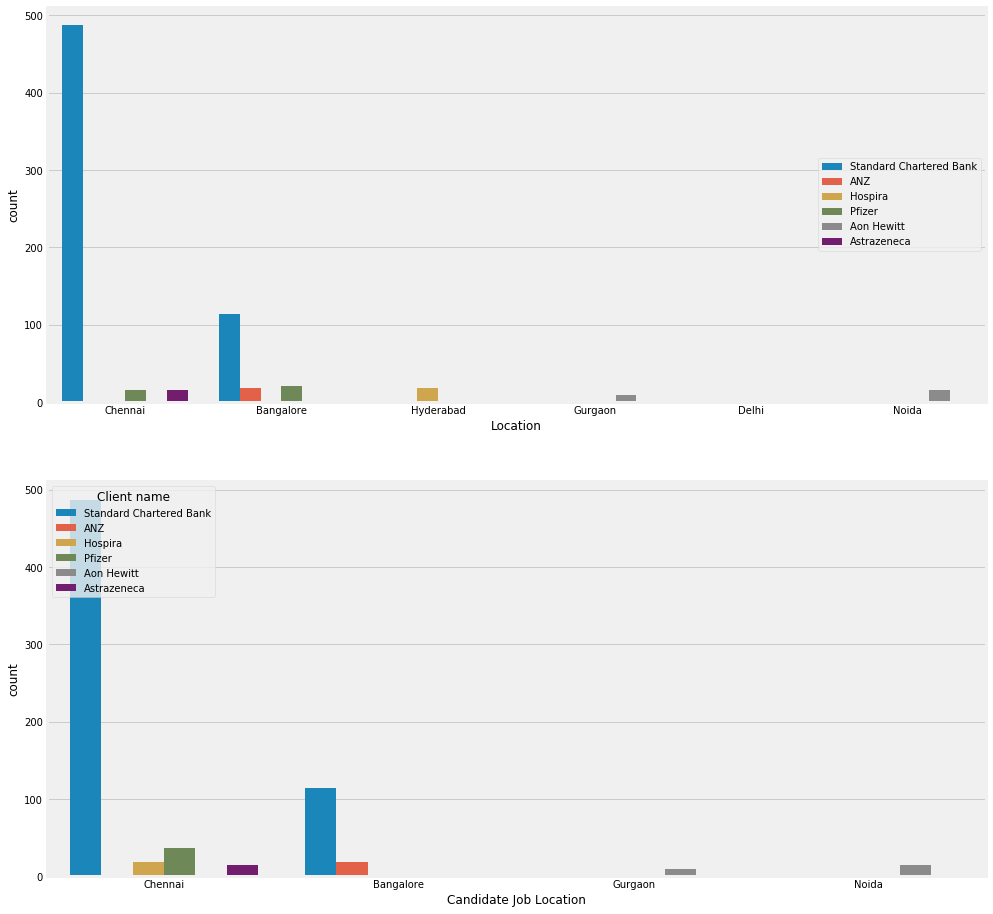

In [42]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Expected Attendance'], ax=ax1)
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Observed Attendance'], ax=ax2)
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interviews['Location'], hue=interviews['Client name'], ax=ax1)
ax1.legend(loc='right')
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Client name'], ax=ax2)
plt.show()

* Traditional trends were seen when it came to Expected and Observed attendance.
    * Lesser people attended the interview than the expected count.
* In this dataset, more jobs were offered at Bangalore and Chennai.
* Standard Chartered offered the highest number of jobs at these locations as it had operations at both Chennai and Bangalore.

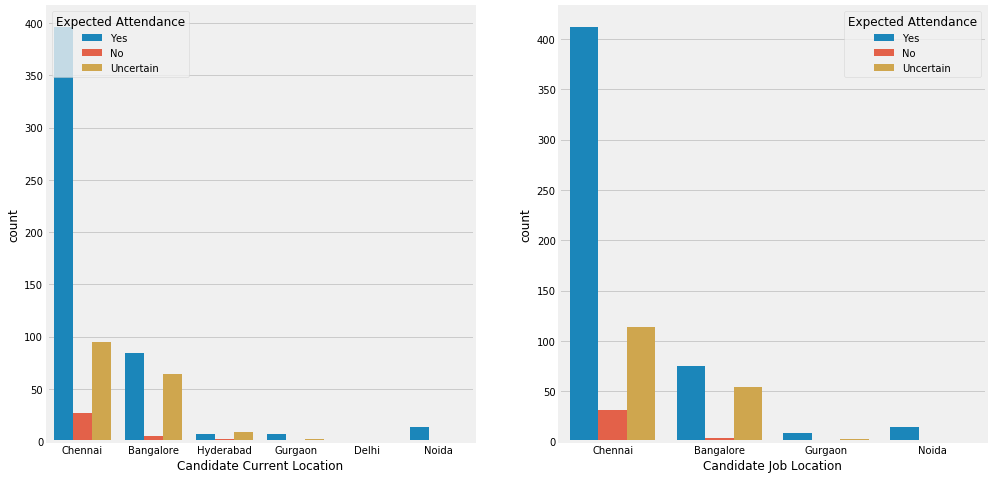

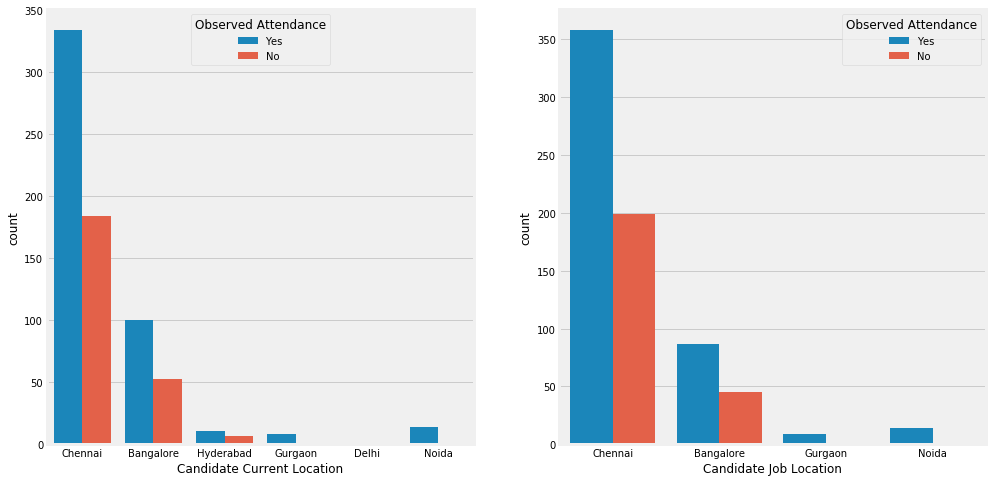

In [43]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interviews['Candidate Current Location'], hue=interviews['Expected Attendance'], ax=ax1)
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Expected Attendance'], ax=ax2)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.countplot(x=interviews['Candidate Current Location'], hue=interviews['Observed Attendance'], ax=ax1)
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Observed Attendance'], ax=ax2)
plt.show()

In [44]:
interviews.groupby(['Candidate Current Location', 'Candidate Job Location', 
                      'Expected Attendance', 'Observed Attendance']).size()

Candidate Current Location  Candidate Job Location  Expected Attendance  Observed Attendance
Bangalore                   Bangalore               No                   No                       3
                                                    Uncertain            No                      28
                                                                         Yes                     26
                                                    Yes                  No                      14
                                                                         Yes                     61
                            Chennai                 No                   No                       2
                                                    Uncertain            No                       5
                                                                         Yes                      5
                                                    Yes                  No                       1
       

Looking at the above graphs and the groupby data:

* People who were unsure of attending the interview had a pretty even distribution in the Observed Attendance attribute.
* People were offered higher percentage of jobs at locations that were same as their current location or were close to their current location.

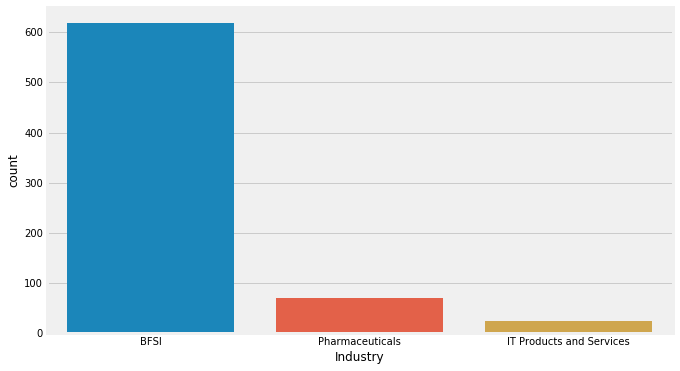

In [45]:
f, ax1 = plt.subplots(1, figsize=(10,6))
sns.countplot(x=interviews['Industry'], ax=ax1)
plt.show()

In [46]:
interviews['Industry'].value_counts()

BFSI                        619
Pharmaceuticals              70
IT Products and Services     25
Name: Industry, dtype: int64

* BFSI industry offered the highest number of jobs with 949 interviews.

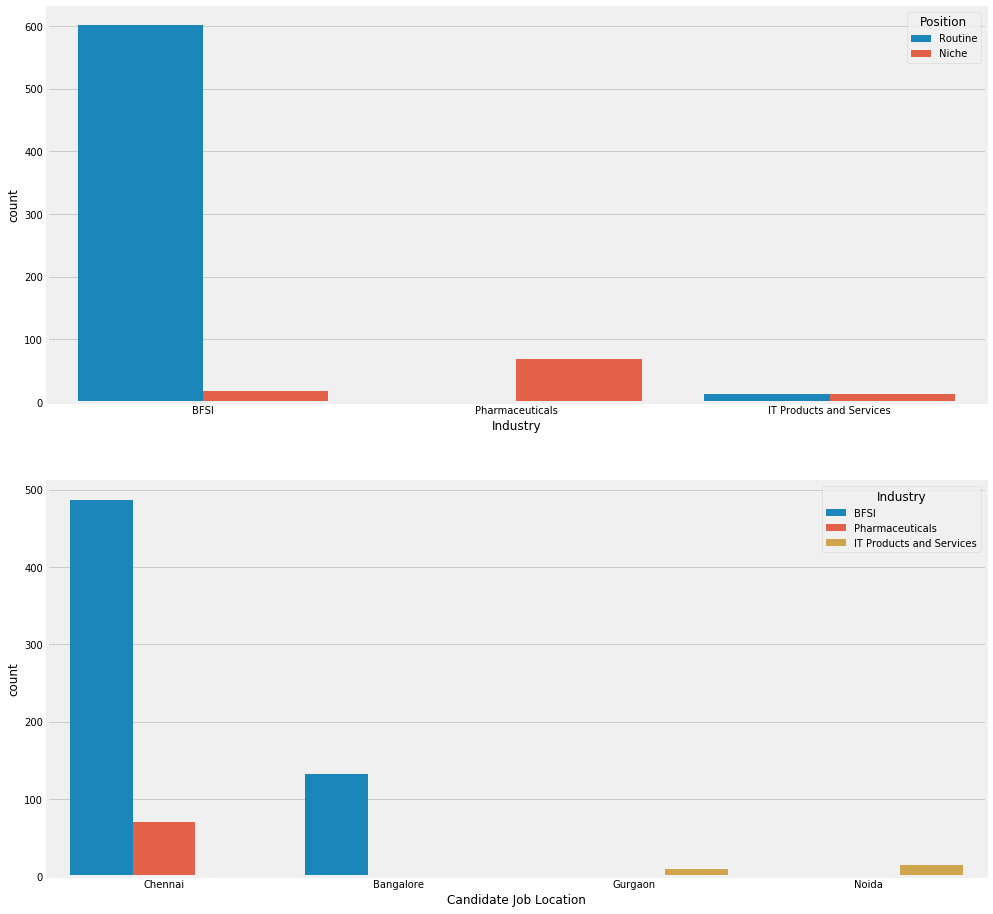

In [47]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interviews['Industry'], hue=interviews['Position'], ax=ax1)
sns.countplot(x=interviews['Candidate Job Location'], hue=interviews['Industry'], ax=ax2)
plt.show()

In [48]:
interviews.groupby(['Industry', 'Position']).size()

Industry                  Position
BFSI                      Niche        18
                          Routine     601
IT Products and Services  Niche        12
                          Routine      13
Pharmaceuticals           Niche        68
                          Routine       2
dtype: int64

* There were a lot of routine jobs offered across BFSI.

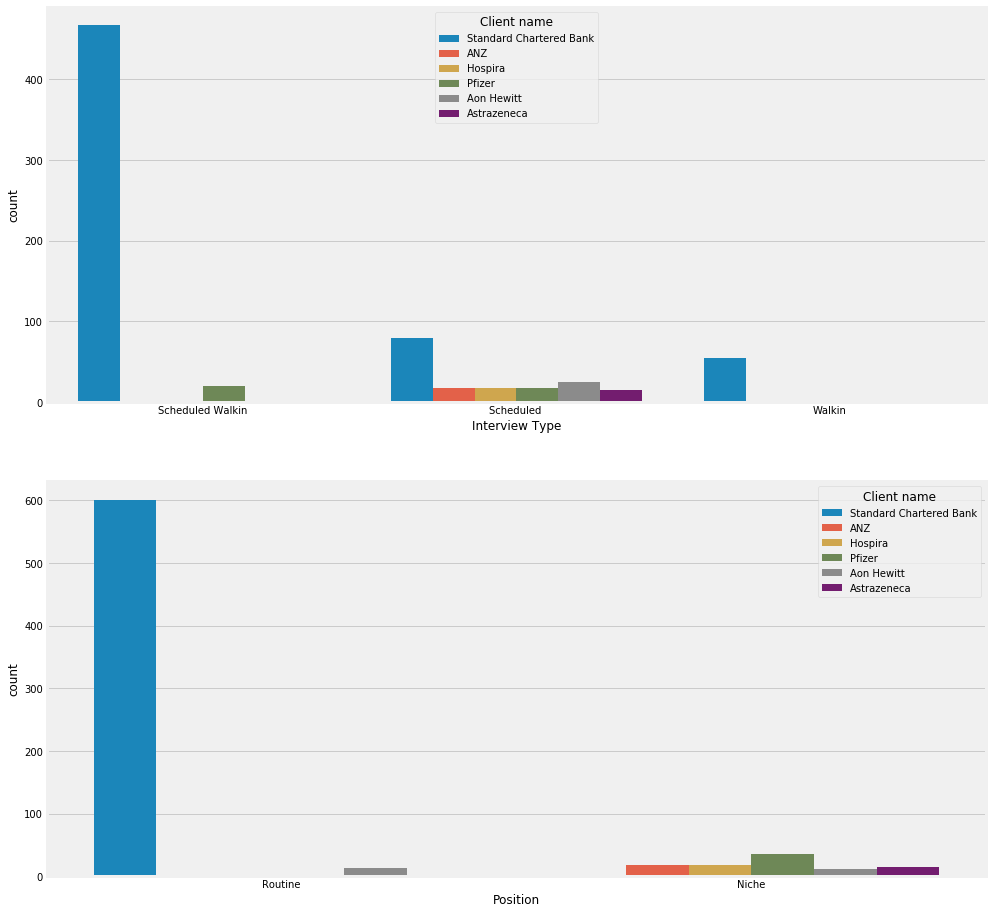

In [49]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interviews['Interview Type'], hue=interviews['Client name'], ax=ax1)
sns.countplot(x=interviews['Position'], hue=interviews['Client name'], ax=ax2)
plt.show()

In [50]:
interviews.groupby(['Industry', 'Client name', 'Position']).size()

Industry                  Client name              Position
BFSI                      ANZ                      Niche        18
                          Standard Chartered Bank  Routine     601
IT Products and Services  Aon Hewitt               Niche        12
                                                   Routine      13
Pharmaceuticals           Astrazeneca              Niche        15
                          Hospira                  Niche        18
                          Pfizer                   Niche        35
                                                   Routine       2
dtype: int64

* Standard Chartered conducted quite a lot of interviews and the Routine position took the lion share.

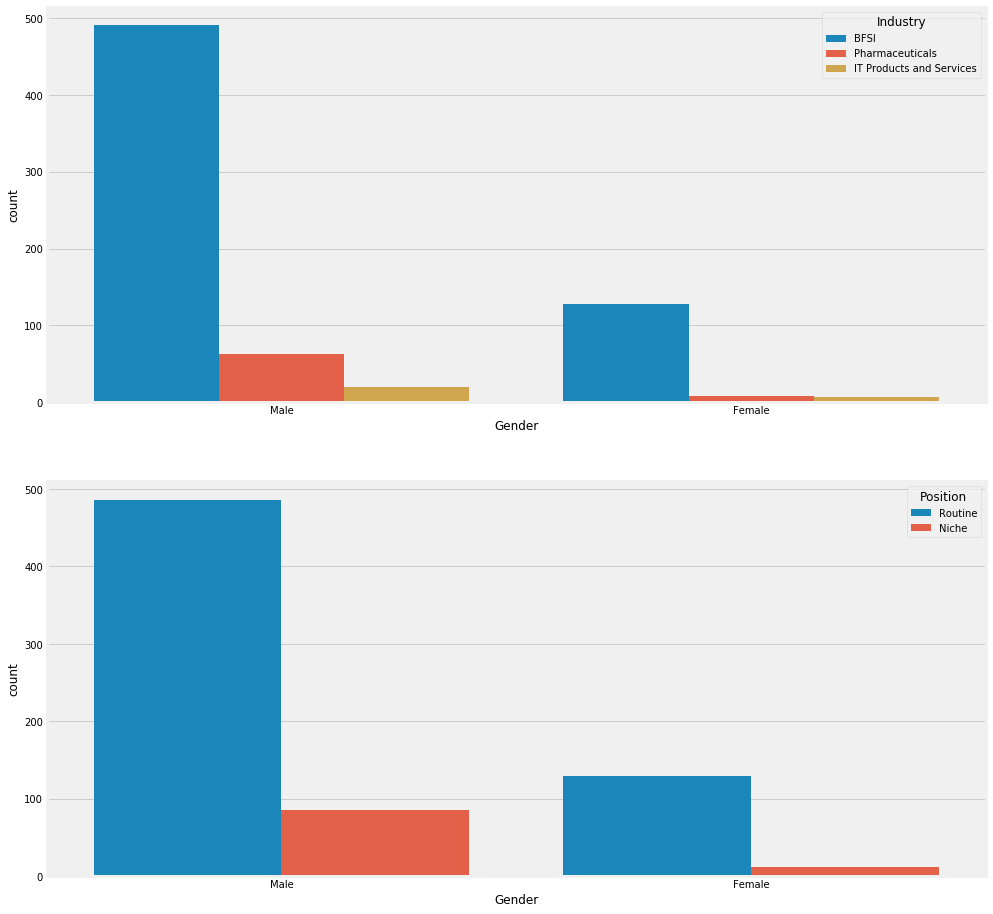

In [51]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,16))
sns.countplot(x=interviews['Gender'], hue=interviews['Industry'], ax=ax1)
sns.countplot(x=interviews['Gender'], hue=interviews['Position'], ax=ax2)
plt.show()

In [52]:
interviews.groupby(['Gender', 'Industry', 'Position']).size()

Gender  Industry                  Position
Female  BFSI                      Niche         2
                                  Routine     126
        IT Products and Services  Niche         2
                                  Routine       4
        Pharmaceuticals           Niche         8
Male    BFSI                      Niche        16
                                  Routine     475
        IT Products and Services  Niche        10
                                  Routine       9
        Pharmaceuticals           Niche        60
                                  Routine       2
dtype: int64

* The dataset contains a higher number of male candidates than female candidates. However, the distibution of jobs offered across industry was pretty similar.

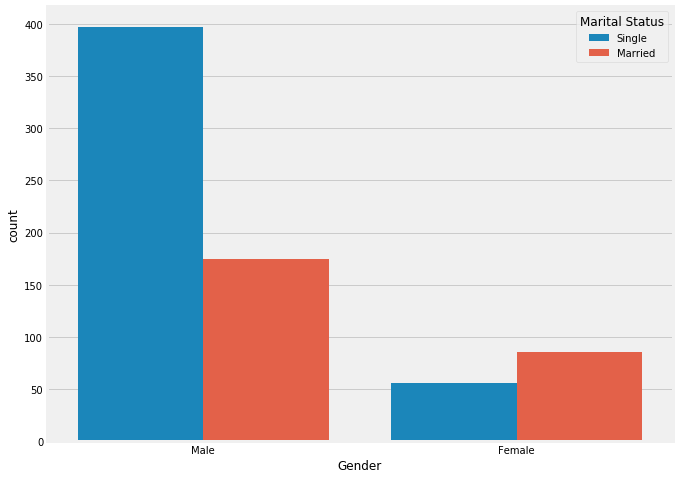

In [53]:
f , ax = plt.subplots(1, figsize=(10,8)) 
sns.countplot(x=interviews['Gender'], hue=interviews['Marital Status'], ax=ax)
plt.show()

In [54]:
interviews.groupby(['Gender', 'Marital Status', 'Expected Attendance', 'Observed Attendance']).size()

Gender  Marital Status  Expected Attendance  Observed Attendance
Female  Married         No                   No                       5
                        Uncertain            No                      10
                                             Yes                     11
                        Yes                  No                      13
                                             Yes                     47
        Single          No                   No                       2
                        Uncertain            No                       8
                                             Yes                     10
                        Yes                  No                       9
                                             Yes                     27
Male    Married         No                   No                      11
                        Uncertain            No                      27
                                             Yes                     17

* A higher number of female candiates were married compared to male candidates.
* However, when it came to expected attendance and observed attendance, the disribution was pretty similar.

In [55]:
interviews.set_index('Name(Cand ID)', inplace=True, drop=True)

In [56]:
interviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, Candidate 95 to Candidate 1233
Data columns (total 32 columns):
Client name                   714 non-null object
Industry                      714 non-null object
Location                      714 non-null object
Position                      714 non-null object
Interview Type                714 non-null object
Gender                        714 non-null object
Candidate Current Location    714 non-null object
Candidate Job Location        714 non-null object
Interview Venue               714 non-null object
Candidate Native location     714 non-null object
Permission                    714 non-null object
Meetings                      714 non-null object
Follow Up Call                714 non-null object
Printout                      714 non-null object
Venue Details                 714 non-null object
Shared Letter                 714 non-null object
Expected Attendance           714 non-null object
Observed Attendance         

In [57]:
le = LabelEncoder()
interviews_c = interviews.apply(le.fit_transform)

In [58]:
interviews_c.corr()

,Client name,Industry,Location,Position,Interview Type,Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Permission,Meetings,Follow Up Call,Printout,Venue Details,Shared Letter,Expected Attendance,Observed Attendance,Marital Status,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Client name,1.000000,-0.522895,-0.426585,0.742722,0.519421,-0.024965,-0.426585,-0.256576,-0.352290,-0.111783,-0.036818,-0.010525,-0.008438,-0.019471,-0.008438,-0.002109,-0.036605,-0.129848,-0.059127,NaN,-0.355097,-0.384789,-0.187601,0.370137,-0.421998,NaN,NaN,NaN,NaN,NaN,NaN,-0.421998
Industry,-0.522895,1.000000,0.376608,-0.834508,-0.410772,0.062071,0.376608,0.271949,0.324461,0.198498,-0.015091,-0.050988,-0.059475,-0.038535,-0.059475,-0.043052,-0.104697,0.071581,-0.136453,NaN,0.415581,0.412066,0.065424,-0.015928,0.430247,NaN,NaN,NaN,NaN,NaN,NaN,0.430247
Location,-0.426585,0.376608,1.000000,-0.258229,-0.243869,-0.011479,1.000000,0.800426,0.985855,0.178628,0.011015,-0.014104,-0.028190,-0.007092,-0.021157,-0.014152,0.055417,0.061880,-0.020166,NaN,0.124979,0.153222,-0.087042,-0.009701,0.159794,NaN,NaN,NaN,NaN,NaN,NaN,0.159794
Position,0.742722,-0.834508,-0.258229,1.000000,0.463310,-0.076374,-0.258229,-0.107477,-0.190288,-0.160623,-0.002956,0.031628,0.038296,0.019695,0.038296,0.014221,0.037507,-0.109324,0.077553,NaN,-0.426185,-0.426108,-0.078442,0.085150,-0.449688,NaN,NaN,NaN,NaN,NaN,NaN,-0.449688
Interview Type,0.519421,-0.410772,-0.243869,0.463310,1.000000,-0.038308,-0.243869,-0.039456,-0.189094,-0.089317,-0.034809,-0.039702,-0.045210,-0.045210,-0.021405,-0.013000,-0.090045,-0.134941,-0.032653,NaN,-0.305836,-0.254263,0.100499,0.152275,-0.302982,NaN,NaN,NaN,NaN,NaN,NaN,-0.302982
Gender,-0.024965,0.062071,-0.011479,-0.076374,-0.038308,1.000000,-0.011479,0.004780,-0.010478,0.101986,0.015167,-0.006175,-0.002560,-0.002560,-0.002560,0.022549,0.034026,-0.014209,0.248396,NaN,-0.072514,-0.074353,-0.027826,0.096934,-0.076394,NaN,NaN,NaN,NaN,NaN,NaN,-0.076394
Candidate Current Location,-0.426585,0.376608,1.000000,-0.258229,-0.243869,-0.011479,1.000000,0.800426,0.985855,0.178628,0.011015,-0.014104,-0.028190,-0.007092,-0.021157,-0.014152,0.055417,0.061880,-0.020166,NaN,0.124979,0.153222,-0.087042,-0.009701,0.159794,NaN,NaN,NaN,NaN,NaN,NaN,0.159794
Candidate Job Location,-0.256576,0.271949,0.800426,-0.107477,-0.039456,0.004780,0.800426,1.000000,0.852220,0.113104,0.013421,-0.014734,-0.007921,-0.007921,0.004482,-0.010837,0.121317,0.058838,0.007719,NaN,0.100497,0.193176,-0.001719,0.136478,0.165812,NaN,NaN,NaN,NaN,NaN,NaN,0.165812
Interview Venue,-0.352290,0.324461,0.985855,-0.190288,-0.189094,-0.010478,0.985855,0.852220,1.000000,0.159620,0.009330,-0.016443,-0.027580,-0.009645,-0.018613,-0.010896,0.075100,0.053606,-0.029736,NaN,0.086858,0.126766,-0.106283,0.040057,0.124204,NaN,NaN,NaN,NaN,NaN,NaN,0.124204
Candidate Native location,-0.111783,0.198498,0.178628,-0.160623,-0.089317,0.101986,0.178628,0.113104,0.159620,1.000000,0.010750,0.010107,0.020111,0.014351,-0.031728,0.028959,0.001924,0.020180,-0.069293,NaN,0.047810,0.038762,-0.075941,-0.047078,0.041716,NaN,NaN,NaN,NaN,NaN,NaN,0.041716


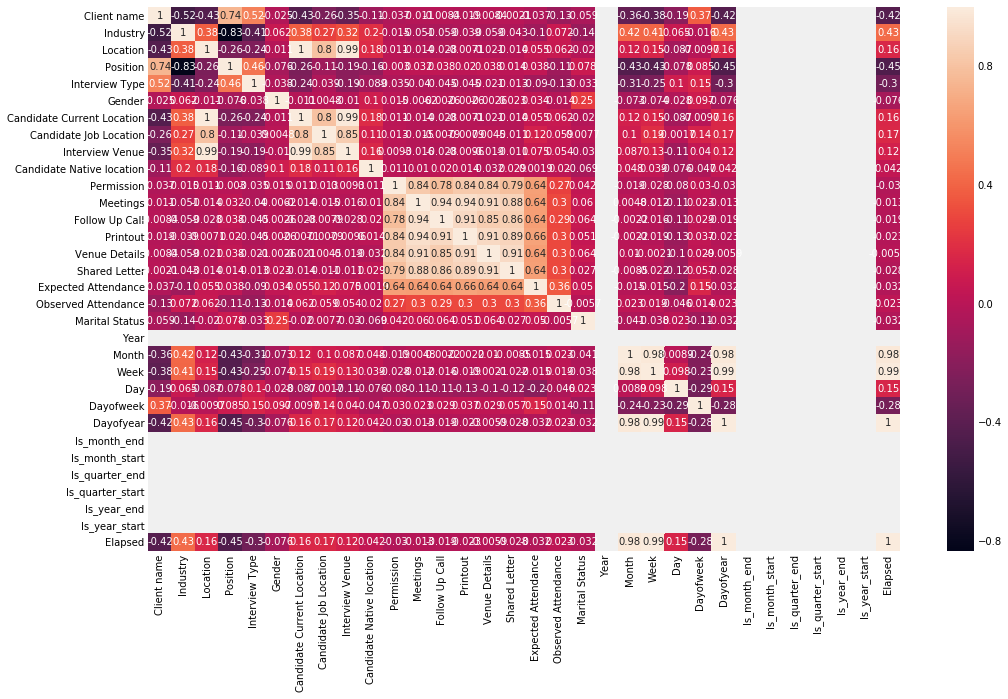

In [59]:
f , ax = plt.subplots(1, figsize=(15,10)) 
sns.heatmap(interviews_c.corr(), ax=ax, annot=True)
plt.show()

* The heatmap shows the relationships that were protrayed earlier:
    * Candidate Current Location, Candidate Job Location and Interview Venue were highly correlated.
    * Industry and Client were also correlated.
* Permission, Meetings, Follow Up Calls, Printout, Venue Details, Shared Letter were also highly correlated.

* The dataset does not have an even distribution and for machine learning tasks, the training set, development set and the validation set need to distributed carefully, ensuring that all three sets have enough data of positive and negative examples.
* Permission, Meetings, Follow Up Calls, Printout, Venue Details, Shared Letter columns could be reduced to a single column using dimensionality reduction techniques such as PCA.

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(interviews_c[['Permission', 'Meetings', 'Follow Up Call', 
                                                    'Printout', 'Venue Details', 'Shared Letter']])

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component'])

principalDf = principalDf.set_index(interviews_c.index)

interviews = pd.concat([interviews, principalDf], axis=1)

In [62]:
# Change any columns of strings in a panda's dataframe to a column of catagorical values (function from fastai)
train_cats(interviews)

In [63]:
df, y, nas = proc_df(interviews, "Observed Attendance")

In [64]:
def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

In [65]:
n_valid = int(len(interviews) * .2)
n_trn = len(interviews) - n_valid
raw_train, raw_valid = split_vals(interviews, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, f1_score

## Modeling

### Base Model

Building a random forest with all default parameters.

In [105]:
# Quick function to eval models
def show_performance_model(model, X_train, y_train, X_test, y_test):
    # check classification scores of logistic regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
    print('Train/Test split results:')
    print(f'{model.__class__.__name__} Training Acc is {round(model.score(X_train, y_train),5)}'),
    print(f'{model.__class__.__name__} Validation Acc is {round(model.score(X_test, y_test), 5)}'),
    try:
        print(f'{model.__class__.__name__} Out-of-Bag Acc is {round(model.oob_score_, 5)}')
    except:
        pass
    print(f'{model.__class__.__name__} log_loss is {round(log_loss(y_test, y_pred_proba), 3)}')
    print(f'{model.__class__.__name__} auc is {round(auc(fpr, tpr), 3)}')
    print(f'{model.__class__.__name__} f1 score is {round(f1_score(y_test , model.predict(X_test)), 3)}')
    print(model.__class__.__name__+" confusion_metrics \n" ,confusion_matrix(y_test, model.predict(X_test)))

    idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")


    print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
          "and a specificity of %.3f" % (1-fpr[idx]) + 
          ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
    return

In [68]:
m_base = RandomForestClassifier(n_jobs = -1, oob_score=True)
%time m_base.fit(X_train, y_train)

CPU times: user 39.8 ms, sys: 4.16 ms, total: 44 ms
Wall time: 122 ms


/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.82692
RandomForestClassifier Validation Acc is 0.70423
RandomForestClassifier Out-of-Bag Acc is 0.59441
RandomForestClassifier log_loss is 1.084
RandomForestClassifier auc is 0.577
RandomForestClassifier f1 score is 0.817
RandomForestClassifier confusion_metrics 
 [[ 6 39]
 [ 3 94]]
Using a threshold of 0.560 guarantees a sensitivity of 0.959 and a specificity of 0.156, i.e. a false positive rate of 84.44%.


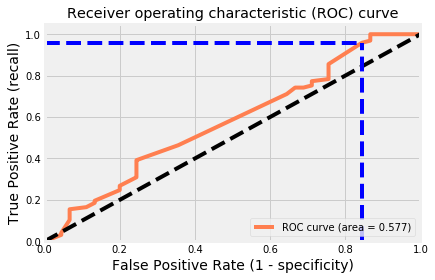

In [69]:
show_performance_model(m_base, X_train, y_train, X_valid, y_valid)

In [70]:
m = RandomForestClassifier(min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

* Though the training set accuracy went down dramatically, this model actually generalized better to the validation set.
* Setting min_samples_leaf tells the model that each node has to have at least 5 rows in it. This results in a simpler model, but one that should generalize better to new data.

* Another lever to pull when tuning is max_features. 
* 'log2' gave me the best performance and the most stable results.

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.72203
RandomForestClassifier Validation Acc is 0.6831
RandomForestClassifier Out-of-Bag Acc is 0.67308
RandomForestClassifier log_loss is 0.623
RandomForestClassifier auc is 0.621
RandomForestClassifier f1 score is 0.812
RandomForestClassifier confusion_metrics 
 [[ 0 45]
 [ 0 97]]
Using a threshold of 0.634 guarantees a sensitivity of 0.959 and a specificity of 0.022, i.e. a false positive rate of 97.78%.


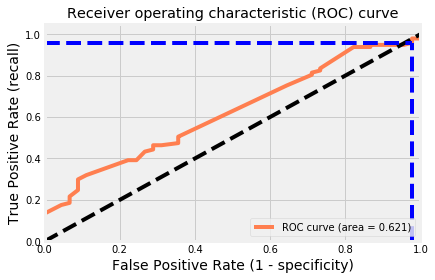

In [71]:
show_performance_model(m, X_train, y_train, X_valid, y_valid )

In [72]:
m = RandomForestClassifier(min_samples_leaf=5, max_features = 'log2',n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.73077
RandomForestClassifier Validation Acc is 0.67606
RandomForestClassifier Out-of-Bag Acc is 0.66084
RandomForestClassifier log_loss is 0.617
RandomForestClassifier auc is 0.574
RandomForestClassifier f1 score is 0.807
RandomForestClassifier confusion_metrics 
 [[ 0 45]
 [ 1 96]]
Using a threshold of 0.630 guarantees a sensitivity of 0.959 and a specificity of 0.044, i.e. a false positive rate of 95.56%.


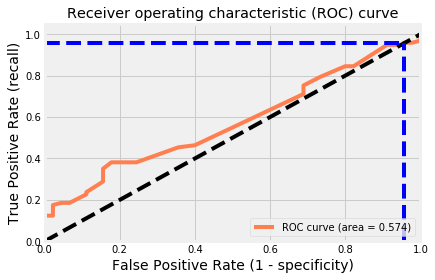

In [73]:
show_performance_model(m, X_train, y_train, X_valid, y_valid )

### Feature Importance

In [74]:
feature_imp = rf_feat_importance(m, df)

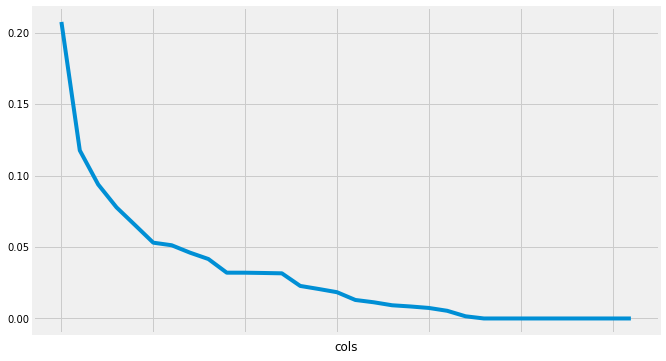

In [75]:
feature_imp.plot('cols', 'imp', figsize = (10, 6), legend = False)

* The first two features explain a lot of the variance in the model

In [76]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend = False)

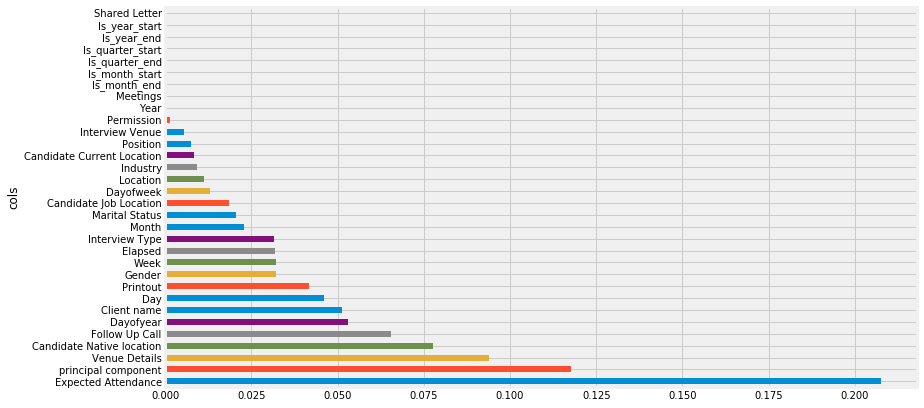

In [77]:
plot_fi(feature_imp);

In [78]:
keep = feature_imp[feature_imp.imp > 0.0075].cols

In [79]:
len(keep)

20

In [80]:
df_keep = df[keep].copy()

In [81]:
X_train, X_valid = split_vals(df_keep, n_trn)

In [82]:
m = RandomForestClassifier(min_samples_leaf = 5,
                           max_features='log2', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.73427
RandomForestClassifier Validation Acc is 0.6831
RandomForestClassifier Out-of-Bag Acc is 0.6521
RandomForestClassifier log_loss is 0.646
RandomForestClassifier auc is 0.492
RandomForestClassifier f1 score is 0.812
RandomForestClassifier confusion_metrics 
 [[ 0 45]
 [ 0 97]]
Using a threshold of 0.693 guarantees a sensitivity of 0.969 and a specificity of 0.022, i.e. a false positive rate of 97.78%.


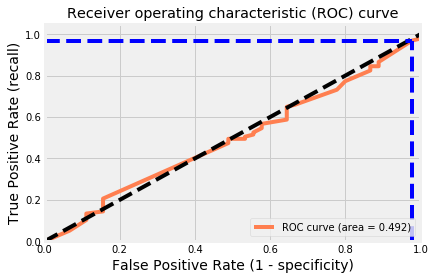

In [83]:
show_performance_model(m, X_train, y_train, X_valid, y_valid )

In [84]:
fi = rf_feat_importance(m, df_keep)

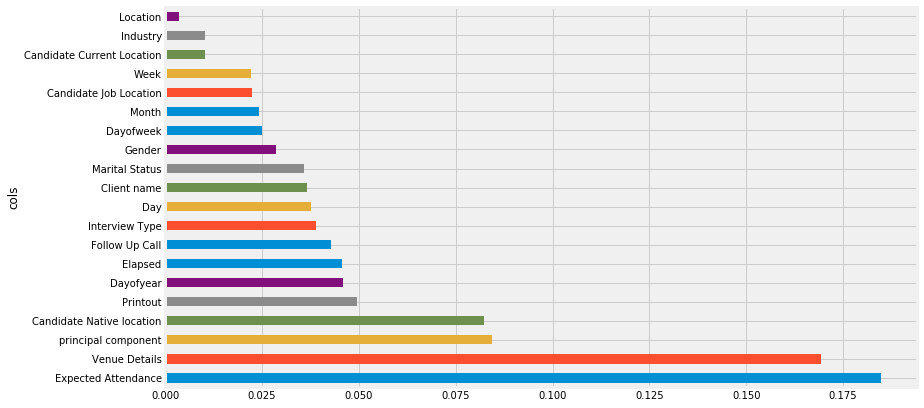

In [85]:
plot_fi(fi);

### One-Hot Encoding

In [86]:
df_trn, y_trn, nas = proc_df(interviews, 'Observed Attendance', max_n_cat = 7)

In [87]:
X_train, X_valid = split_vals(df_trn, n_trn)

In [88]:
m = RandomForestClassifier(min_samples_leaf = 5,
                           max_features='log2', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.70979
RandomForestClassifier Validation Acc is 0.6831
RandomForestClassifier Out-of-Bag Acc is 0.68706
RandomForestClassifier log_loss is 0.625
RandomForestClassifier auc is 0.584
RandomForestClassifier f1 score is 0.812
RandomForestClassifier confusion_metrics 
 [[ 0 45]
 [ 0 97]]
Using a threshold of 0.690 guarantees a sensitivity of 0.969 and a specificity of 0.156, i.e. a false positive rate of 84.44%.


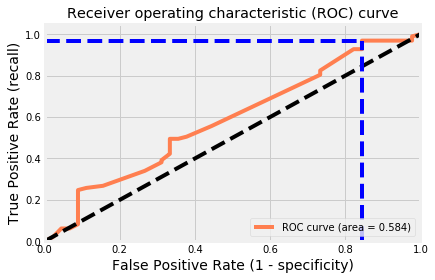

In [89]:
show_performance_model(m, X_train, y_train, X_valid, y_valid )

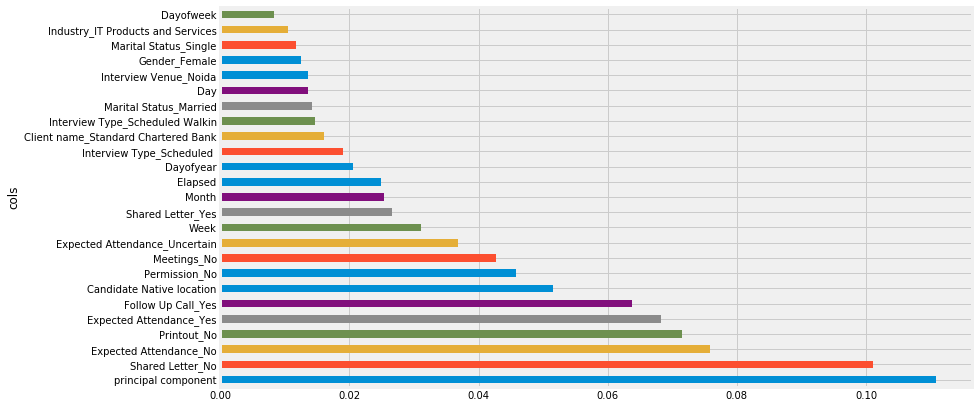

In [90]:
fi = rf_feat_importance(m, df_trn)
plot_fi(fi[:25]);

### Removing Redundant features

In [91]:
from scipy.cluster import hierarchy as hc

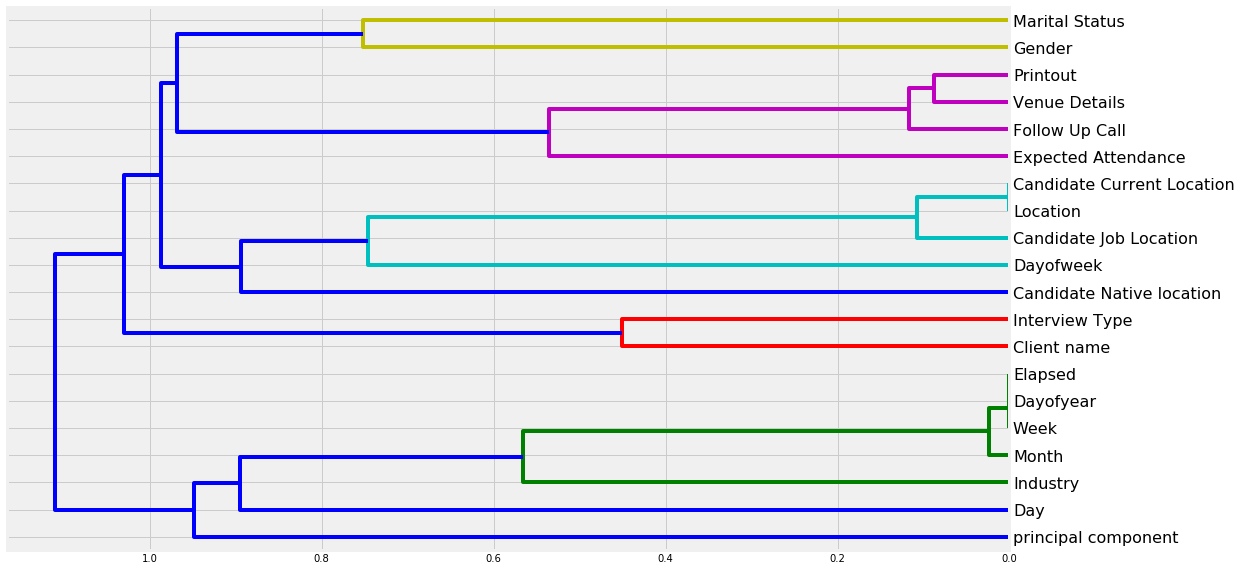

In [92]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels = df_keep.columns, orientation='left',
                          leaf_font_size =16)
plt.show();

In [93]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=40, min_samples_leaf=8, max_features='sqrt', n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [94]:
get_oob(df_keep)

0.6695804195804196

In [95]:
for c in ('Week', 'Dayofyear'):
    print(c, get_oob(df_keep.drop(c, axis = 1)))

Week 0.6730769230769231
Dayofyear 0.6695804195804196


In [96]:
interviews.drop(['Dayofyear'], axis = 1, inplace = True)
df_trn, y_trn, nas = proc_df(interviews, 'Observed Attendance', max_n_cat = 7)
X_train, X_valid = split_vals(df_trn, n_trn)

In [97]:
m = RandomForestClassifier(min_samples_leaf = 5,
                           max_features='log2', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Train/Test split results:
RandomForestClassifier Training Acc is 0.71329
RandomForestClassifier Validation Acc is 0.6831
RandomForestClassifier Out-of-Bag Acc is 0.69056
RandomForestClassifier log_loss is 0.61
RandomForestClassifier auc is 0.655
RandomForestClassifier f1 score is 0.812
RandomForestClassifier confusion_metrics 
 [[ 0 45]
 [ 0 97]]
Using a threshold of 0.673 guarantees a sensitivity of 0.969 and a specificity of 0.156, i.e. a false positive rate of 84.44%.


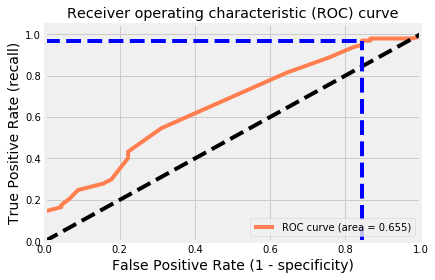

In [98]:
show_performance_model(m, X_train, y_train, X_valid, y_valid )

## Training with all data

In [99]:
df, y, nas = proc_df(interviews, "Observed Attendance")
m = RandomForestClassifier(min_samples_leaf = 5,
                           max_features='log2', n_jobs=-1, oob_score=True)
m.fit(df, y)
print("Training Acc:", round(m.score(df, y),5)),
print("Out-of-Bag Acc:", round(m.oob_score_, 5))

/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/shubham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Training Acc: 0.72129
Out-of-Bag Acc: 0.68207


### Gradient Boost Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gbc = GradientBoostingClassifier(random_state=0,n_estimators=250)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Train/Test split results:
GradientBoostingClassifier Training Acc is 0.8042
GradientBoostingClassifier Validation Acc is 0.65493
GradientBoostingClassifier log_loss is 0.688
GradientBoostingClassifier auc is 0.571
GradientBoostingClassifier f1 score is 0.784
GradientBoostingClassifier confusion_metrics 
 [[ 4 41]
 [ 8 89]]
Using a threshold of 0.317 guarantees a sensitivity of 0.979 and a specificity of 0.022, i.e. a false positive rate of 97.78%.


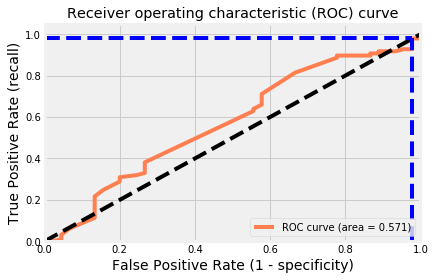

In [112]:
show_performance_model(gbc, X_train, y_train, X_valid, y_valid )

### XGBoost Classifier

In [117]:
from xgboost import XGBClassifier

In [119]:
model = XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Train/Test split results:
GradientBoostingClassifier Training Acc is 0.8042
GradientBoostingClassifier Validation Acc is 0.65493
GradientBoostingClassifier log_loss is 0.688
GradientBoostingClassifier auc is 0.571
GradientBoostingClassifier f1 score is 0.784
GradientBoostingClassifier confusion_metrics 
 [[ 4 41]
 [ 8 89]]
Using a threshold of 0.317 guarantees a sensitivity of 0.979 and a specificity of 0.022, i.e. a false positive rate of 97.78%.


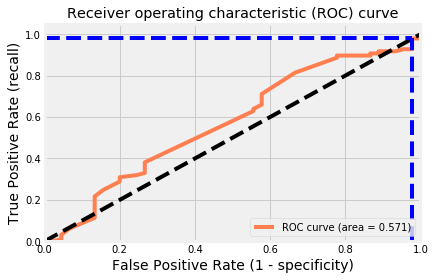

In [120]:
show_performance_model(gbc, X_train, y_train, X_valid, y_valid )